In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from parula import parula, parula_black

In [114]:
scene = 'kitchen'
data = np.load(f'processed/{scene}.npy', allow_pickle=True)[()]

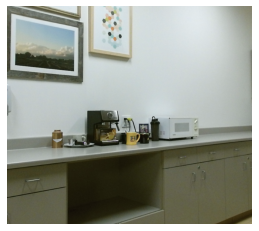

In [115]:
plt.imshow(data['image'])
plt.axis('off');

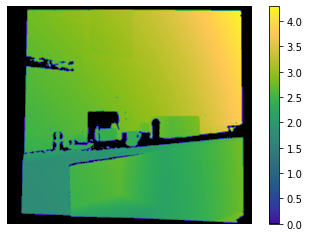

In [116]:
plt.imshow(data['depth'], cmap=parula_black)
plt.colorbar()
plt.axis('off');

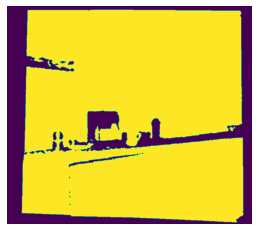

In [117]:
plt.imshow(data['mask'])
plt.axis('off');

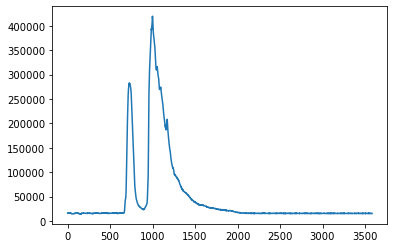

In [118]:
plt.plot(data['transient'])

In [123]:
# Plot qualitative comparison
# Run after prediction has been made
model = 'MiDaS'
mde = np.load(f'../../results_captured/{scene}/{model}/mde.npy', allow_pickle=True)[()]
mde['depth'] = mde['depth'].squeeze()
mde_diff = np.abs(mde['depth'] - data['depth'])

transient = np.load(f'../../results_captured/{scene}/{model}/transient.npy', allow_pickle=True)[()]
transient['depth'] = transient['depth'].squeeze()
transient_diff = np.abs(transient['depth'] - data['depth'])

diff_norm = mpl.colors.Normalize(vmin=min(np.min(mde_diff), np.min(transient_diff)),
                                 vmax=max(np.max(mde_diff), np.max(transient_diff)))

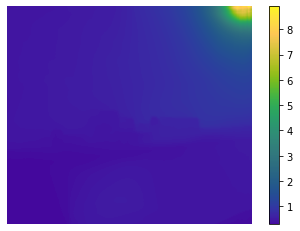

In [124]:
plt.imshow(mde['depth'].squeeze(), cmap=parula)
plt.colorbar()
plt.axis('off');

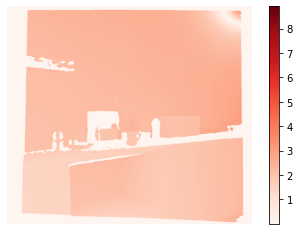

In [125]:
plt.imshow(mde_diff.squeeze()*data['mask'], cmap=plt.get_cmap('Reds'), norm=diff_norm)
plt.colorbar()
plt.axis('off');

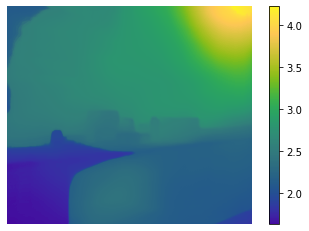

In [126]:
plt.imshow(transient['depth'], cmap=parula)
plt.colorbar()
plt.axis('off');

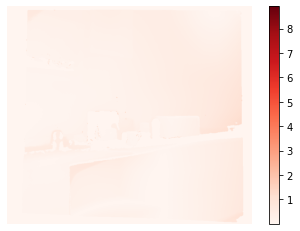

In [127]:
plt.imshow(transient_diff*data['mask'], cmap=plt.get_cmap('Reds'), norm=diff_norm)
plt.colorbar()
plt.axis('off');